In [6]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/MSFT (2).csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,30.620001,31.100000,30.590000,30.950001,23.474924,38409100
1,2010-01-05,30.850000,31.100000,30.639999,30.959999,23.482508,49749600
2,2010-01-06,30.879999,31.080000,30.520000,30.770000,23.338400,58182400
3,2010-01-07,30.629999,30.700001,30.190001,30.450001,23.095678,50559700
4,2010-01-08,30.280001,30.879999,30.240000,30.660000,23.254959,51197400
...,...,...,...,...,...,...,...
2510,2019-12-23,158.119995,158.119995,157.270004,157.410004,151.686249,17718200
2511,2019-12-24,157.479996,157.710007,157.119995,157.380005,151.657333,8989200
2512,2019-12-26,157.559998,158.729996,157.399994,158.669998,152.900436,14520600
2513,2019-12-27,159.449997,159.550003,158.220001,158.960007,153.179916,18412800


date & closing price dataframe columns

In [8]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2010-01-04,30.950001
1,2010-01-05,30.959999
2,2010-01-06,30.770000
3,2010-01-07,30.450001
4,2010-01-08,30.660000
...,...,...
2510,2019-12-23,157.410004
2511,2019-12-24,157.380005
2512,2019-12-26,158.669998
2513,2019-12-27,158.960007


In [9]:
df['Date']

0       2010-01-04
1       2010-01-05
2       2010-01-06
3       2010-01-07
4       2010-01-08
           ...    
2510    2019-12-23
2511    2019-12-24
2512    2019-12-26
2513    2019-12-27
2514    2019-12-30
Name: Date, Length: 2515, dtype: object

In [10]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [11]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-11-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      2010-01-04
1      2010-01-05
2      2010-01-06
3      2010-01-07
4      2010-01-08
          ...    
2510   2019-12-23
2511   2019-12-24
2512   2019-12-26
2513   2019-12-27
2514   2019-12-30
Name: Date, Length: 2515, dtype: datetime64[ns]

In [12]:
df.index = df.pop('Date')
df

,Close
Date,
2010-01-04,30.950001
2010-01-05,30.959999
2010-01-06,30.770000
2010-01-07,30.450001
2010-01-08,30.660000
...,...
2019-12-23,157.410004
2019-12-24,157.380005
2019-12-26,158.669998


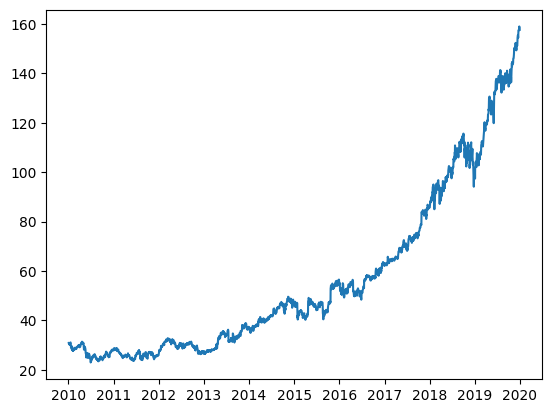

In [13]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [14]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

windowed_df = df_to_windowed_df(df,'2010-03-25','2012-03-23',n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2010-03-25,29.600000,29.879999,29.650000,30.010000
1,2010-03-26,29.879999,29.650000,30.010000,29.660000
2,2010-03-29,29.650000,30.010000,29.660000,29.590000
3,2010-03-30,30.010000,29.660000,29.590000,29.770000
4,2010-03-31,29.660000,29.590000,29.770000,29.290001
...,...,...,...,...,...
500,2012-03-19,32.770000,32.849998,32.599998,32.200001
501,2012-03-20,32.849998,32.599998,32.200001,31.990000
502,2012-03-21,32.599998,32.200001,31.990000,31.910000
503,2012-03-22,32.200001,31.990000,31.910000,32.000000


In [15]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((505,), (505, 3, 1), (505,))

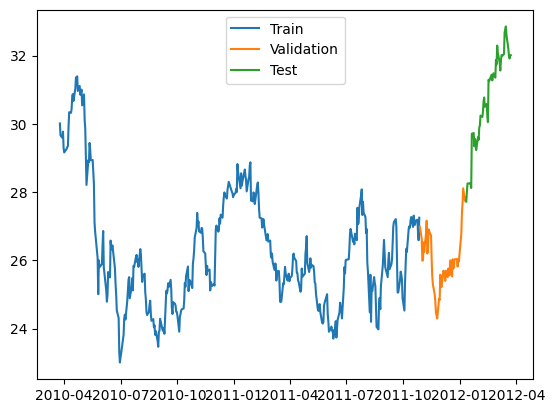

In [16]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
13/13 [==============================] - 4s 50ms/step - loss: 625.1418 - mean_absolute_error: 24.9392 - val_loss: 569.3041 - val_mean_absolute_error: 23.8447
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 537.3180 - mean_absolute_error: 23.1037 - val_loss: 456.1300 - val_mean_absolute_error: 21.3393
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 390.5502 - mean_absolute_error: 19.6253 - val_loss: 265.2412 - val_mean_absolute_error: 16.2607
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 174.7118 - mean_absolute_error: 12.7901 - val_loss: 54.3329 - val_mean_absolute_error: 7.3145
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 20.8655 - mean_absolute_error: 3.7122 - val_loss: 3.3667 - val_mean_absolute_error: 1.6519
Epoch 6/100
13/13 [==============================] - 0s 8ms/step - loss: 8.7267 - mean_absolute_error: 2.6278 - val_loss: 5.2324 - val_mean_absolute_error: 2.109

13/13 [==============================] - 1s 3ms/step


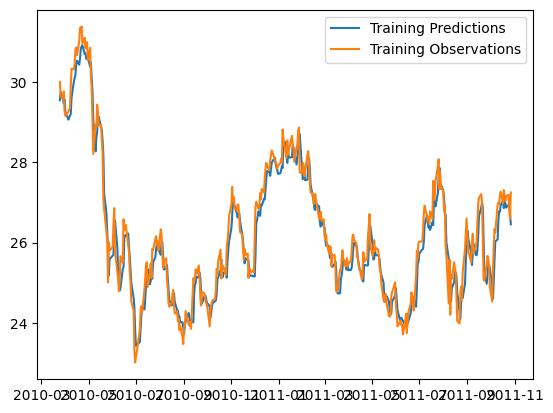

In [18]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

2/2 [==============================] - 0s 12ms/step


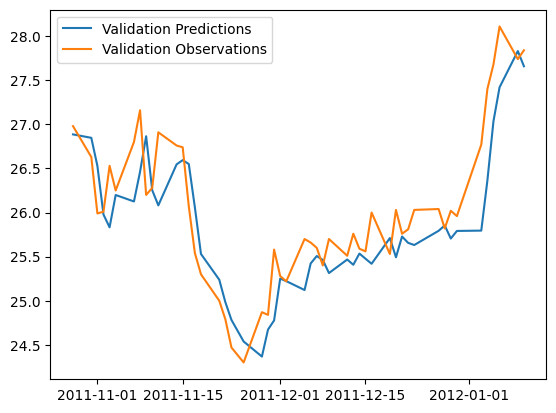

In [19]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

2/2 [==============================] - 0s 6ms/step


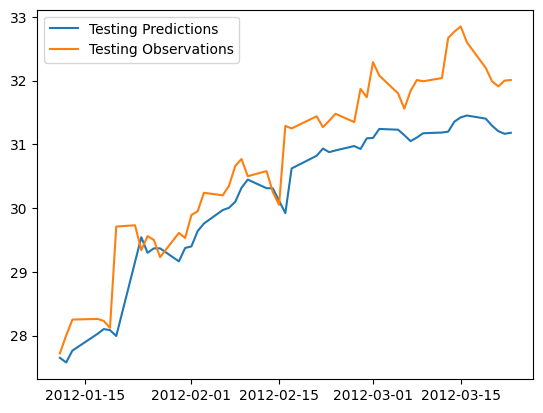

In [20]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions','Testing Observations'])


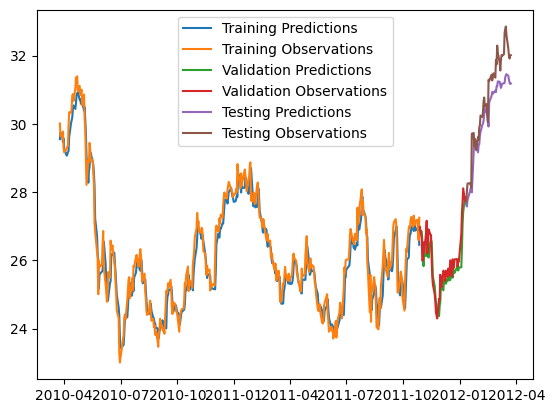

In [21]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [22]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 20ms/step


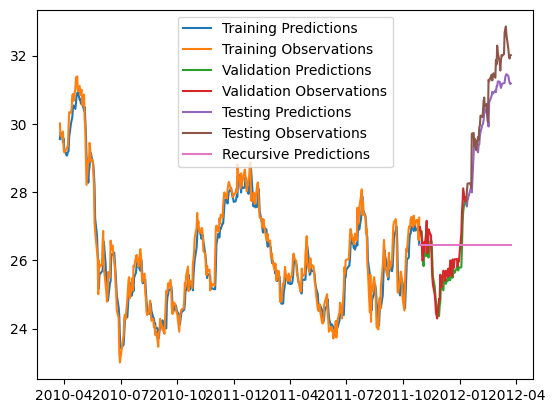

In [23]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])